### Unit 7 | Assignment - Distinguishing Sentiments
#1. The overall sentiment of the BBC is more positive than the other media outlets evaluated.
#2.CNN's compound score is significantly more negative than the other media
#3.CNN's tweets that are extremely negative (-0.75 -1.0) whereas the other media tweets are moderately negative.

In [ ]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# Target Search Term
news = ("@CNN", "@BBC", "@NYtimes",
                "@CBS", "@Foxnews")

def get_news_df(news_name):
    tweets  = []
    for status in tweepy.Cursor(api.search, q=news_name).items(100):
        tweets.append(status)
    df = pd.DataFrame([x._json for x in tweets])[['text', 'created_at']]
    df['brand'] = news_name
    return df

dfs = [get_news_df(x) for x in news]
df_concat = pd.concat(dfs, axis=0)

In [4]:
analyzer = SentimentIntensityAnalyzer() 

def get_sentiment(some_text):
    return analyzer.polarity_scores(some_text)
    

df_concat['sent'] = df_concat.text.map(get_sentiment)
df_concat['pos'] = df_concat.sent.map(lambda x: x.get('pos'))
df_concat['neg'] = df_concat.sent.map(lambda x: x.get('neg'))
df_concat['neu'] = df_concat.sent.map(lambda x: x.get('neu'))
df_concat['compound'] = df_concat.sent.map(lambda x: x.get('compound'))

In [5]:
df_concat.head()

,text,created_at,brand,sent,pos,neg,neu,compound
0,@MariaTCardona @TheRickWilson @kathygriffin ...,Sun Jul 01 22:03:41 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1,"RT @CNN: ""How dare you. How dare you take the ...",Sun Jul 01 22:03:41 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
2,"RT @CNN: ""How dare you. How dare you take the ...",Sun Jul 01 22:03:41 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
3,@CNN #FamiliesBelongTogetherMarch @Acosta @Rea...,Sun Jul 01 22:03:40 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
4,@CNN BREAKING: CNN is pushing for the impeachm...,Sun Jul 01 22:03:40 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


In [6]:
df_concat.to_csv('newstweets.csv')

In [7]:
grouped_media_comp=df_concat.groupby('brand').mean()
grouped_media_comp.drop(grouped_media_comp.columns[[0,1,2,]], axis=1, inplace=True)

In [8]:
grouped_media_comp.head()

,compound
brand,
@BBC,0.104064
@CBS,-0.023743
@CNN,-0.046743
@Foxnews,0.001298
@NYtimes,0.025590


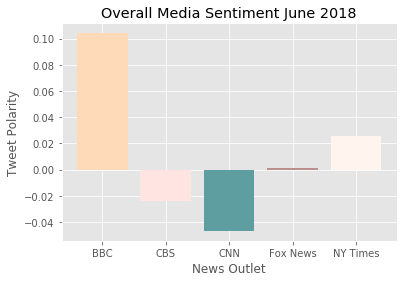

In [9]:
height = grouped_media_comp["compound"]
bars = ('BBC', 'CBS', 'CNN', 'Fox News', 'NY Times')
y_pos = np.arange(len(bars))
plt.title("Overall Media Sentiment June 2018")
plt.ylabel('Tweet Polarity')
plt.xlabel('News Outlet')

plt.bar(y_pos, height, color=['peachpuff', 'mistyrose', 'cadetblue', 'rosybrown', 'seashell'])
plt.xticks(y_pos, bars)
plt.show()

In [10]:
df_concat['tweetsago'] = df_concat.index
df_concat.head()

,text,created_at,brand,sent,pos,neg,neu,compound,tweetsago
0,@MariaTCardona @TheRickWilson @kathygriffin ...,Sun Jul 01 22:03:41 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,0
1,"RT @CNN: ""How dare you. How dare you take the ...",Sun Jul 01 22:03:41 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,1
2,"RT @CNN: ""How dare you. How dare you take the ...",Sun Jul 01 22:03:41 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,2
3,@CNN #FamiliesBelongTogetherMarch @Acosta @Rea...,Sun Jul 01 22:03:40 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,3
4,@CNN BREAKING: CNN is pushing for the impeachm...,Sun Jul 01 22:03:40 +0000 2018,@CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,4


In [30]:
BBC = df_concat[df_concat['brand'] =='@BBC']
CBS = df_concat[df_concat['brand'] =='@CBS']
CNN = df_concat[df_concat['brand'] =='@CNN']
Fox = df_concat[df_concat['brand'] =='@Foxnews']
NYT = df_concat[df_concat['brand'] =='@NYtimes']

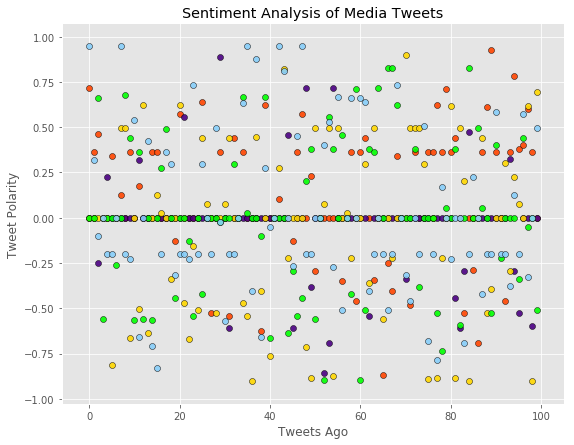

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x='tweetsago', y='compound', data=BBC, c='orangered', alpha = 0.9,edgecolors="black",)
ax.scatter(x='tweetsago', y='compound', data=CBS, c='indigo', alpha = 0.9,edgecolors="black",)
ax.scatter(x='tweetsago', y='compound', data=CNN, c='gold', alpha = 0.9,edgecolors="black",)
ax.scatter(x='tweetsago', y='compound', data=Fox, c='lime', alpha = 0.9,edgecolors="black",)
ax.scatter(x='tweetsago', y='compound', data=NYT, c='lightskyblue', alpha = 0.9,edgecolors="black",)


plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets")


#ax.legend((title),loc='upper right', shadow=True)
plt.grid(True)

# resize the figure to match the aspect ratio of the Axes    
fig.set_size_inches(9, 7, forward=True)


plt.show()